In [67]:
import pandas as pd
# Read JSON file (or use pd.read_json('your_file.json'))
df = pd.read_json('problems_data.jsonl', lines=True)
# Export to CSV
df.to_csv('output.csv', index=False)


In [68]:
import pandas as pd

# Load dataset
df = pd.read_csv("output.csv")

df.head()


,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2\n2 3\n1 3\n3...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0\n2 3 2\n50 60 50\n30 50 40', 'ou...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,NaN,NaN,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3\n3 C\n2 C\n1 C', 'output': 'GH...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0\n10 0\n10 10', 'output': '14.1...",hard,9.6,https://open.kattis.com/problems/barktree


In [69]:
df.shape

(4112, 8)

In [70]:
df.columns

Index(['title', 'description', 'input_description', 'output_description',
       'sample_io', 'problem_class', 'problem_score', 'url'],
      dtype='object')

In [71]:
df.dtypes

title                  object
description            object
input_description      object
output_description     object
sample_io              object
problem_class          object
problem_score         float64
url                    object
dtype: object

In [72]:
df.isnull().sum()

title                   0
description            81
input_description     120
output_description    131
sample_io               0
problem_class           0
problem_score           0
url                     0
dtype: int64

In [73]:
df['problem_class'].value_counts()


problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64

In [74]:
df['problem_score'].describe()


count    4112.000000
mean        5.114689
std         2.177770
min         1.100000
25%         3.300000
50%         5.200000
75%         6.900000
max         9.700000
Name: problem_score, dtype: float64

In [75]:
sample_idx = 0

print("TITLE:\n", df.loc[sample_idx, 'title'])
print("\nDESCRIPTION:\n", df.loc[sample_idx, 'description'])
print("\nINPUT:\n", df.loc[sample_idx, 'input_description'])
print("\nOUTPUT:\n", df.loc[sample_idx, 'output_description'])
print("\nCLASS:", df.loc[sample_idx, 'problem_class'])
print("SCORE:", df.loc[sample_idx, 'problem_score'])


TITLE:
 Uuu

DESCRIPTION:
 Unununium (Uuu) was the name of the chemical
    element with atom number 111, until it changed to
    Röntgenium (Rg) in 2004. These heavy elements are very
    unstable and have only been synthesized in a few
    laboratories.
You have just been hired by one of these labs to optimize
    the algorithms used in simulations. For example, when
    simulating complicated chemical reactions, it is important to
    keep track of how many particles there are, and this is done by
    counting connected components in a graph.
Currently, the lab has some Python code (see attachments)
    that takes an undirected graph and outputs the number of
    connected components. As you can see, this code is based on
    everyone’s favourite data structure union-find1.
After looking at the code for a while, you notice that it
    actually has a bug in it! The code still gives correct answers,
    but the bug could cause it to run inefficiently. Your task is
    to construct a g

In [76]:
df = df.drop(columns=["url"])

In [77]:
text_columns = [
    "title",
    "description",
    "input_description",
    "output_description",
    "sample_io"
]

for col in text_columns:
    df[col] = df[col].fillna("")

In [78]:
df["full_text"] = (
    df["title"] + "\n" +
    df["description"] + "\n" +
    "Input:\n" + df["input_description"] + "\n" +
    "Output:\n" + df["output_description"] + "\n" +
    "Sample:\n" + df["sample_io"]
)

In [79]:
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text)  # normalize whitespace
    return text.strip()

df["full_text"] = df["full_text"].apply(clean_text)


In [80]:
df[["full_text", "problem_class", "problem_score"]].head()

,full_text,problem_class,problem_score
0,uuu unununium (uuu) was the name of the chemic...,hard,9.7
1,house building a number of eccentrics from cen...,hard,9.7
2,mario or luigi mario and luigi are playing a g...,hard,9.6
3,the wire ghost žofka is bending a copper wire....,hard,9.6
4,barking up the wrong tree your dog spot is let...,hard,9.6


In [81]:
df.head(5)

,title,description,input_description,output_description,sample_io,problem_class,problem_score,full_text
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2\n2 3\n1 3\n3...",hard,9.7,uuu unununium (uuu) was the name of the chemic...
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0\n2 3 2\n50 60 50\n30 50 40', 'ou...",hard,9.7,house building a number of eccentrics from cen...
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,mario or luigi mario and luigi are playing a g...
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3\n3 C\n2 C\n1 C', 'output': 'GH...",hard,9.6,the wire ghost žofka is bending a copper wire....
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0\n10 0\n10 10', 'output': '14.1...",hard,9.6,barking up the wrong tree your dog spot is let...


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=2000,
    ngram_range=(1,2),
    stop_words="english",
    min_df=5,
    max_df=0.8
)

X_tfidf = tfidf.fit_transform(df["full_text"])


In [83]:
import numpy as np

df["char_count"] = df["full_text"].apply(len)
df["word_count"] = df["full_text"].apply(lambda x: len(x.split()))
df["line_count"] = df["full_text"].apply(lambda x: x.count("\n") + 1)


In [84]:
import re

df["digit_count"] = df["full_text"].apply(
    lambda x: len(re.findall(r"\d", x))
)


In [85]:
symbols = ["+", "-", "*", "/", "%", "^", "<=", ">=", "=="]

for sym in symbols:
    df[f"sym_{sym}"] = df["full_text"].apply(lambda x: x.count(sym))
symbols = ["+", "-", "*", "/", "%", "^", "<=", ">=", "=="]

for sym in symbols:
    df[f"sym_{sym}"] = df["full_text"].apply(lambda x: x.count(sym))
df.head(5)

,title,description,input_description,output_description,sample_io,problem_class,problem_score,full_text,char_count,word_count,...,digit_count,sym_+,sym_-,sym_*,sym_/,sym_%,sym_^,sym_<=,sym_>=,sym_==
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2\n2 3\n1 3\n3...",hard,9.7,uuu unununium (uuu) was the name of the chemic...,1672,303,...,38,0,1,0,0,0,0,0,0,0
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0\n2 3 2\n50 60 50\n30 50 40', 'ou...",hard,9.7,house building a number of eccentrics from cen...,1418,254,...,32,1,2,0,0,0,0,0,0,0
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,mario or luigi mario and luigi are playing a g...,1280,225,...,16,0,0,0,0,0,3,0,0,0
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3\n3 C\n2 C\n1 C', 'output': 'GH...",hard,9.6,the wire ghost žofka is bending a copper wire....,1428,255,...,26,0,0,0,0,0,0,0,0,0
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0\n10 0\n10 10', 'output': '14.1...",hard,9.6,barking up the wrong tree your dog spot is let...,2249,424,...,36,0,0,0,0,0,0,0,0,0


In [86]:
keywords = [
    "dp", "dynamic programming", "graph", "tree",
    "union find", "dsu", "shortest path",
    "recursion", "backtracking", "greedy",
    "bitmask", "segment tree", "fenwick",
    "matrix", "modulo", "prime", "bfs", "dfs"
]
for kw in keywords:
    col_name = f"kw_{kw.replace(' ', '_')}"
    df[col_name] = df["full_text"].apply(lambda x: x.count(kw))
df.head(5)

,title,description,input_description,output_description,sample_io,problem_class,problem_score,full_text,char_count,word_count,...,kw_backtracking,kw_greedy,kw_bitmask,kw_segment_tree,kw_fenwick,kw_matrix,kw_modulo,kw_prime,kw_bfs,kw_dfs
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2\n2 3\n1 3\n3...",hard,9.7,uuu unununium (uuu) was the name of the chemic...,1672,303,...,0,0,0,0,0,0,0,0,0,0
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0\n2 3 2\n50 60 50\n30 50 40', 'ou...",hard,9.7,house building a number of eccentrics from cen...,1418,254,...,0,0,0,0,0,0,0,0,0,0
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,mario or luigi mario and luigi are playing a g...,1280,225,...,0,0,0,0,0,0,0,0,0,0
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3\n3 C\n2 C\n1 C', 'output': 'GH...",hard,9.6,the wire ghost žofka is bending a copper wire....,1428,255,...,0,0,0,0,0,0,0,0,0,0
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0\n10 0\n10 10', 'output': '14.1...",hard,9.6,barking up the wrong tree your dog spot is let...,2249,424,...,0,0,0,0,0,0,0,0,0,0


In [90]:
numeric_cols = (
    ["char_count", "word_count", "line_count", "digit_count"] +
    ["sym_plus", "sym_minus", "sym_mul", "sym_div",
     "sym_mod", "sym_pow", "sym_le", "sym_ge", "sym_eq"] +
    [c for c in df.columns if c.startswith("kw_")]
)


In [87]:
from scipy.sparse import hstack

numeric_features = df[
    ["char_count", "word_count", "line_count", "digit_count"] +
    [f"sym_{s}" for s in symbols] +
    [f"kw_{kw.replace(' ', '_')}" for kw in keywords]
].values
print(numeric_features)

[[1672  303    1 ...    0    0    0]
 [1418  254    1 ...    0    0    0]
 [1280  225    1 ...    0    0    0]
 ...
 [ 254   32    1 ...    0    0    0]
 [ 513   66    1 ...    0    0    0]
 [2500  430    1 ...    0    0    0]]


In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)
numeric_features_scaled *= 2.0



In [23]:
X = hstack([X_tfidf, numeric_features_scaled])


In [24]:
y_class = df["problem_class"]
y_score = df["problem_score"]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_class_train, y_class_test, y_score_train, y_score_test = train_test_split(
    X,
    y_class,
    y_score,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)


In [26]:
print(X_train.shape)
print(X_test.shape)


(3289, 2031)
(823, 2031)


In [27]:
print(y_class_train.value_counts(normalize=True))
print(y_class_test.value_counts(normalize=True))


problem_class
hard      0.471876
medium    0.341745
easy      0.186379
Name: proportion, dtype: float64
problem_class
hard      0.472661
medium    0.341434
easy      0.185905
Name: proportion, dtype: float64


In [28]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42)

clf.fit(X_train, y_class_train)


c:\Users\aryn3\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [29]:
y_class_pred = clf.predict(X_test)


In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_class_test, y_class_pred)
print("Classification Accuracy:", accuracy)


Classification Accuracy: 0.47509113001215064


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_class_test, y_class_pred))


              precision    recall  f1-score   support

        easy       0.45      0.35      0.39       153
        hard       0.54      0.65      0.59       389
      medium       0.36      0.30      0.33       281

    accuracy                           0.48       823
   macro avg       0.45      0.43      0.44       823
weighted avg       0.46      0.48      0.46       823



In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_class_test, y_class_pred, labels=["easy", "medium", "hard"])
print(cm)


[[ 53  47  53]
 [ 35  85 161]
 [ 30 106 253]]


In [33]:
import numpy as np

feature_names = tfidf.get_feature_names_out()
classes = clf.classes_

for i, cls in enumerate(classes):
    top = np.argsort(clf.coef_[i])[-10:]
    print(f"\nTop features for class {cls}:")
    print(feature_names[top])



Top features for class easy:
['correct' 'lines line' 'bottles' 'whitespace' 'companies' '24'
 'output print' 'problems' 'world' 'assume']

Top features for class hard:
['forms' 'rows columns' 'loves' 'lines containing' 'regions' 'existing'
 'choose' 'takes' 'exists' 'arbitrary']

Top features for class medium:
['favorite' 'defined' 'lift' 'n10 10' 'changes' 'change' 'don' 'n1 n4'
 'stock' 'win']


REGRESSION

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

reg.fit(X_train, y_score_train)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=200, random_state=42)

In [36]:
y_score_pred = reg.predict(X_test)

In [37]:
y_score_test

1335    6.3
2182    5.0
3717    2.0
3501    2.4
3199    3.0
       ... 
288     8.3
235     8.5
2493    4.4
2138    5.1
1345    6.3
Name: problem_score, Length: 823, dtype: float64

In [38]:
df2 = pd.DataFrame({
    "True_Score": y_score_test,
    "Predicted_Score": y_score_pred
})
df2

,True_Score,Predicted_Score
1335,6.3,5.293334
2182,5.0,4.612491
3717,2.0,4.367315
3501,2.4,4.954824
3199,3.0,4.393244
...,...,...
288,8.3,4.971813
235,8.5,5.909803
2493,4.4,5.639803
2138,5.1,5.167110


In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_score_test, y_score_pred)
print("MAE:", mae)


MAE: 1.6818036779092083


In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_score_test, y_score_pred))
print("RMSE:", rmse)


RMSE: 2.016721521049646


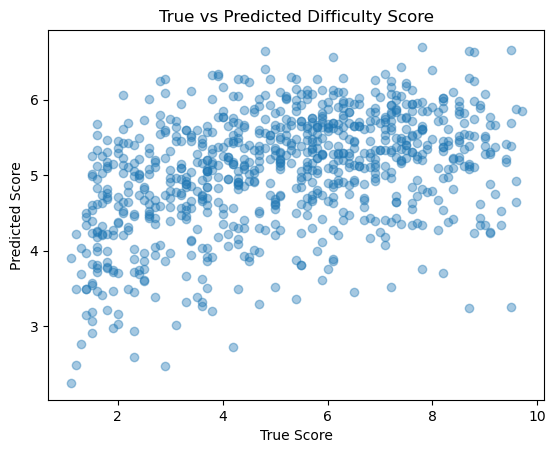

In [41]:
import matplotlib.pyplot as plt

plt.scatter(y_score_test, y_score_pred, alpha=0.4)
plt.xlabel("True Score")
plt.ylabel("Predicted Score")
plt.title("True vs Predicted Difficulty Score")
plt.show()


In [42]:
importances = reg.feature_importances_
top_idx = importances.argsort()[-10:]

print("Top influential features:")
print(top_idx)


Top influential features:
[ 421 1002  828  305  671 1148 1423 2009 1127 2001]


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(
    n_estimators=500,
        max_depth=50,
        random_state=42
)

rf_reg.fit(X_train, y_score_train)
y_score_pred = rf_reg.predict(X_test)

In [45]:
df3 = pd.DataFrame({
    "True_Score": y_score_test,
    "Predicted_Score": y_score_pred
})
df3

,True_Score,Predicted_Score
1335,6.3,5.221847
2182,5.0,4.692232
3717,2.0,4.630098
3501,2.4,5.423464
3199,3.0,4.890859
...,...,...
288,8.3,5.073926
235,8.5,5.732340
2493,4.4,5.691378
2138,5.1,5.094698


In [46]:
rmse = np.sqrt(mean_squared_error(y_score_test, y_score_pred))
print("RMSE:", rmse)

RMSE: 1.9955802869998005


In [47]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()


In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=500,
    max_depth=50,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train_dense, y_class_train)


RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [49]:
y_class_pred_rf = rf_clf.predict(X_test_dense)

In [50]:
from sklearn.metrics import accuracy_score

accuracy_rf = accuracy_score(y_class_test, y_class_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.5540704738760632


In [91]:
mae = mean_absolute_error(y_score_test, y_score_pred)
print("MAE:", mae)

MAE: 1.6605750294768074


In [92]:
import joblib

joblib.dump(rf_clf, "models/rf_classifier.pkl")
joblib.dump(rf_reg, "models/rf_regressor.pkl")
joblib.dump(tfidf, "models/tfidf.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(numeric_cols, "models/numeric_cols.pkl")


['models/numeric_cols.pkl']

In [63]:
import sklearn
print(sklearn.__version__)


1.2.2


In [64]:
import sys
print(sys.executable)


c:\Users\aryn3\anaconda3\python.exe


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_class_test, y_class_pred_rf))


              precision    recall  f1-score   support

        easy       0.53      0.42      0.47       153
        hard       0.57      0.84      0.68       389
      medium       0.52      0.23      0.32       281

    accuracy                           0.55       823
   macro avg       0.54      0.50      0.49       823
weighted avg       0.54      0.55      0.52       823



In [53]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(
    y_class_test,
    y_class_pred_rf,
    labels=["easy", "medium", "hard"]
)

print(cm_rf)


[[ 64  26  63]
 [ 29  66 186]
 [ 27  36 326]]


In [54]:
import numpy as np

importances = rf_clf.feature_importances_
top_idx = np.argsort(importances)[-15:]

print("Top 15 important feature indices:")
print(top_idx)


Top 15 important feature indices:
[  11  713  862 1120  852  828  829 1324 1127 1148 1673 1423 2003 2000
 2001]


In [60]:
df3 = pd.DataFrame({
    "True_Score": y_class_test,
    "Predicted_Score": y_class_pred_rf
})
df3.head(12)

,True_Score,Predicted_Score
1335,hard,hard
2182,medium,hard
3717,easy,hard
3501,easy,hard
3199,medium,hard
3259,medium,medium
3821,easy,hard
1769,hard,hard
142,hard,hard
2882,medium,medium


In [56]:
# Baseline predictions: always predict "medium"
y_class_pred_baseline = ["medium"] * len(y_class_test)


In [57]:
from sklearn.metrics import accuracy_score

baseline_accuracy = accuracy_score(y_class_test, y_class_pred_baseline)
print("Baseline Accuracy (Always Medium):", baseline_accuracy)


Baseline Accuracy (Always Medium): 0.34143377885783716
